# Convolutional Neural Networks

In this notebook, we will show an example that we will follow step by step to understand the basic concepts of convolutional networks such as:
- Kernel Size
- Padding
- Stride
- Pooling
- Flatten Layer

Convolutional Neural Networks are very similar to ordinary Neural Networks. They are made up of neurons that have learnable weights and biases. Each neuron reveices some inputs, perfom a dot product and optionally follows it with a non-linearity. So, what changes?

Convolutional networks make the explicit assumption that the inputs are images, which allows us to encode certain properties into the architecture. The layers of a Convulutional networks have neurons arranged in three dimensions: width, height and depth.

Example: If the input image has dimensions 32x32x3, we have an input of  32 (width) x 32 (height) x 3 (depth: Red, Green, Blue channels).

## Convolutional Layer

Intuitively, we could say that the main purpose of a convolutional layer is to detect visual features or characteristics in images. Another important feature is that convolutional layers can learn spatial hierarchies of patterns. That is, if we had a convolutional network, the first layer could learn fundamental elements like edges, the second could learn composite elements of basic elements learned in the previous layer, and so on. In general, convolutional layers operate with 3D tensors, called feature maps, with two spatial axes referring to height and width, and another axis referring to the channel/depth.

<center><img src="https://drive.google.com/uc?id=1bSVBGzpW176Ttfsp5ZCYRV7oA8P2NuU6" style="float:left; padding:0.7em"width=500/>
<figcaption style="text-align: center"><strong>Fig. 1: Schematic Diagram of a Convolutional Neural Network for Image Recognition: Decoding the 'Cat'. Source: Deep Learning with Python Book</strong></figcaption></center>





In this example, we observe an input of size 6x6, and a 6x6 feature map (output) is created. In this case, our kernel size is 3x3, referring to the dimensions of the sliding window over the input. The choice of this hyperparameter has a significant impact on image classification tasks.

For example, small kernel sizes are able to extract a much larger amount of information containing highly local features from the input. Smaller kernel size also leads to a smaller reduction in layer dimensions, which allows for a deeper architecture. Conversely, a large kernel size extracts less information, which leads to a faster reduction in layer dimensions, often leading to worse performance. Large kernels are better suited to extract features that are larger.

The kernel moves one pixel at a time in both vertical and horizontal directions, a movement known as the "stride." A larger stride leads to a smaller output size. Additionally, you can observe that the kernel shifts one position further along each axis due to the use of "padding" in the input. Padding involves adding zeros (zero-padding) around the input images, resulting in a larger output compared to not applying padding.



<img src="https://upload.wikimedia.org/wikipedia/commons/1/19/2D_Convolution_Animation.gif" style="width:150; float:left; padding:0.7em"/>
<figcaption style="text-align: center"><strong>Fig. 2: 2D Convolution Example. Source: https://en.m.wikipedia.org/wiki/File:2D_Convolution_Animation.gif</strong></figcaption>


## Pooling

Typically, pooling layers are used following a convolutional layer.Their primary purpose is to simplify the information gathered by the convolutional layer and create a condensed version of the contained information.

There are various ways to apply pooling, with the most common being max-pooling. Max-pooling is an operation that calculates the maximum value for patches of a feature map and uses it to create a downsampled (pooled) feature map. Max-pooling introduces a degree of translation invariance, meaning that minor translations of the image do not significantly impact the values of most pooled outputs.

<img src="https://computersciencewiki.org/images/8/8a/MaxpoolSample2.png?20180226194350" style="width:150; float:left; padding:0.7em"/>
<figcaption style="text-align: center"><strong>Fig. 3: Max-pooling example. Source: https://computersciencewiki.org/index.php/File:MaxpoolSample2.png</strong></figcaption>



In [2]:
#@title Viz
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches, animation
from IPython.display import HTML
import ipywidgets as widget
from ipywidgets import interact


def plot_convolution(input_size, padding, kernel_size, stride):
    # Calculate the output size
    output_size = ((input_size - kernel_size + 2 * padding) // stride) + 1

    # Create the padded input matrix
    padded_input_size = input_size + 2 * padding

    # Fill the input matrix with random values and apply padding
    input_matrix = np.zeros((padded_input_size, padded_input_size))
    input_matrix[padding:padded_input_size - padding, padding:padded_input_size - padding] = np.random.rand(input_size, input_size)

    # Create the output matrix
    output_matrix = np.zeros((output_size, output_size))

    # Define a sample kernel with weights
    kernel = np.array([[0.1, 0.2, 0.1], [0.2, 0.3, 0.2], [-0.1, -0.2, -0.1]])
    if kernel_size != 3:
        kernel = np.ones((kernel_size, kernel_size)) / (kernel_size * kernel_size)
        kernel[-1] = -kernel[-1]

    vmin = -1
    vmax = 1

    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Input matrix visualization
    ax[0].set_title(f"Input ({input_size}, {input_size})\nAfter-padding ({padded_input_size}, {padded_input_size})")
    im_input = ax[0].imshow(input_matrix, cmap='viridis', vmin=vmin, vmax=vmax)  # Use viridis colormap

    # Output matrix visualization
    ax[1].set_title(f"Output ({output_size}, {output_size})")
    im_output = ax[1].imshow(output_matrix, cmap='viridis', vmin=vmin, vmax=vmax)  # Use viridis colormap

    # Kernel visualization
    kernel_rect = patches.Rectangle((-0.5, -0.5), kernel_size, kernel_size, fill=False, edgecolor='red', lw=2)
    ax[0].add_patch(kernel_rect)

    # Function to update the animation
    def update(frame):
        nonlocal kernel_rect
        if frame == 0:
            return im_input, im_output, kernel_rect
        else:
            i, j = divmod(frame - 1, output_size)
            i, j = i * stride, j * stride  # Adjust index according to the stride
            if i + kernel_size <= padded_input_size and j + kernel_size <= padded_input_size:
                input_slice = input_matrix[i:i + kernel_size, j:j + kernel_size]
                output_value = np.sum(input_slice * kernel)
                output_matrix[i // stride, j // stride] = output_value
                im_output.set_data(output_matrix)

                kernel_rect.set_xy((j - 0.5, i - 0.5))
        return im_input, im_output, kernel_rect

    num_frames = output_size * output_size + 1
    ani = animation.FuncAnimation(fig, update, frames=num_frames, blit=True, repeat=False)

    plt.close(fig)
    return HTML(ani.to_jshtml())

input_size_slider = widget.IntSlider(min=1, max=20, step=1, value=4, description='Input Size')
padding_slider = widget.IntSlider(min=0, max=5, step=1, value=1, description='Padding')
kernel_size_slider = widget.IntSlider(min=1, max=7, step=1, value=2, description='Kernel Size')
stride_slider = widget.IntSlider(min=1, max=5, step=1, value=1, description='Stride')

interact(plot_convolution, input_size=input_size_slider, padding=padding_slider,
         kernel_size=kernel_size_slider, stride=stride_slider)

interactive(children=(IntSlider(value=4, description='Input Size', max=20, min=1), IntSlider(value=1, descript…

<function __main__.plot_convolution(input_size, padding, kernel_size, stride)>

# **Exercise 1: Basic Convolution Operation**

## 1) Apply a simple 2D convolution operation without padding and with a stride of 1.

Input Matrix:
$
\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9
\end{bmatrix}
$
Kernel:
$
\begin{bmatrix}
-1 &0 &1 \\
-2 &0 &2 \\
-1 &0 &1
\end{bmatrix}
$

Hint:

* $Output \ Size = [\frac{Input \ Size \ - \ Kernel \ Size\ +\ 2 \ \times \ Padding}{Stride}] + 1$

**Questions:**

1. What is the output matrix after applying the convolution?

Given
- Input: 3×3
- Kernel: 3×3
- Padding: p = 0
- Stride: s = 1

1) Compute the output size
Using the following formula:

Output Size = [(Input Size − Kernel Size + 2·Padding) / Stride] + 1

Substitute values:
Output Size = [(3 − 3 + 2·0) / 1] + 1
            = [0 / 1] + 1
            = 1

So the output is a 1×1 matrix.

2) Apply the kernel on the only valid window
Since input and kernel are both 3×3, there is exactly one patch: the whole input.

Input X:
[ [1, 2, 3],
  [4, 5, 6],
  [7, 8, 9] ]

Kernel K:
[ [-1, 0, 1],
  [-2, 0, 2],
  [-1, 0, 1] ]

We perform element-wise multiplication and sum the results (this is the “convolution” used in most DL code, i.e., cross-correlation, consistent with:
np.sum(input_slice * kernel)):

1·(-1) + 2·0 + 3·1
+ 4·(-2) + 5·0 + 6·2
+ 7·(-1) + 8·0 + 9·1

Compute each row:

Row 1: 1·(-1) + 2·0 + 3·1 = -1 + 0 + 3 = 2
Row 2: 4·(-2) + 5·0 + 6·2 = -8 + 0 + 12 = 4
Row 3: 7·(-1) + 8·0 + 9·1 = -7 + 0 + 9 = 2

Total: 2 + 4 + 2 = 8

Output matrix:
[ [8] ]


2. Describe the effect of the kernel on the input image. What feature does this kernel help to detect?

It computes the left-to-right intensity gradient by subtracting values on the left side of the window and adding values on the right side, producing strong responses where the image changes sharply horizontally.

Feature detected: Vertical edges (vertical contours/borders) — i.e., areas with strong horizontal intensity changes.

In [ ]:
import numpy as np

# Code implementation in order to check that the calculation of the convolution is correct

# Input matrix and kernel
X = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
], dtype=float)

K = np.array([
    [-1,  0,  1],
    [-2,  0,  2],
    [-1,  0,  1]
], dtype=float)

def conv2d_no_padding_stride1(X: np.ndarray, K: np.ndarray) -> np.ndarray:
    """
    2D convolution as used in many CNN implementations (cross-correlation):
    output[i,j] = sum( X[i:i+kh, j:j+kw] * K )
    No padding, stride=1.
    """
    h, w = X.shape
    kh, kw = K.shape

    out_h = (h - kh) + 1
    out_w = (w - kw) + 1

    Y = np.zeros((out_h, out_w), dtype=float)

    for i in range(out_h):
        for j in range(out_w):
            patch = X[i:i+kh, j:j+kw]
            Y[i, j] = np.sum(patch * K)

    return Y

Y = conv2d_no_padding_stride1(X, K)

print("Input (X):\n", X)
print("\nKernel (K):\n", K)
print("\nOutput (Y) with no padding and stride=1:\n", Y)

Input (X):
 [[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]

Kernel (K):
 [[-1.  0.  1.]
 [-2.  0.  2.]
 [-1.  0.  1.]]

Output (Y) with no padding and stride=1:
 [[8.]]


## 2) Apply a 2D convolution operation with padding (1 layer of zero padding) and a stride of 1.

Input Matrix:
$
\begin{bmatrix}
1 &0& 2\\
3 &0& 4\\
5 &6& 0
\end{bmatrix}
$
Kernel:
$
\begin{bmatrix}
0 &1& 0 \\
1 &-4& 1\\
0 &1& 0
\end{bmatrix}
$

**Questions:**

1. What is the output matrix after applying the convolution with padding?

Given
- Input: 3×3
- Kernel: 3×3
- Padding: p = 1 (one layer of zeros)
- Stride: s = 1

1) Compute the output size:

Output Size = [(Input Size − Kernel Size + 2p) / s] + 1

Substitute values:
Output Size = [(3 − 3 + 2·1) / 1] + 1
            = [2] + 1
            = 3

So the output is a 3×3 matrix.

2) Pad the input (zero-padding with 1 layer)

Original input X:
[
  [1, 0, 2],
  [3, 0, 4],
  [5, 6, 0]
]

Padded input X_pad (size 5×5):
[
  [0, 0, 0, 0, 0],
  [0, 1, 0, 2, 0],
  [0, 3, 0, 4, 0],
  [0, 5, 6, 0, 0],
  [0, 0, 0, 0, 0]
]

Kernel K:
[
  [0,  1, 0],
  [1, -4, 1],
  [0,  1, 0]
]

We use the same operation as your notebook: cross-correlation
Y[i,j] = Σ(patch ⊙ K)
(i.e., np.sum(patch * K))

Because this kernel has zeros on corners, each output is equivalent to:
Y = (up + down + left + right) − 4·(center)

3) Compute each output cell (3×3)

Row 1
- Y[0,0]: center=1, neighbors up=0, down=3, left=0, right=0
  0 + 3 + 0 + 0 − 4·1 = 3 − 4 = -1

- Y[0,1]: center=0, neighbors up=0, down=0, left=1, right=2
  0 + 0 + 1 + 2 − 4·0 = 3

- Y[0,2]: center=2, neighbors up=0, down=4, left=0, right=0
  0 + 4 + 0 + 0 − 4·2 = 4 − 8 = -4

Row 2
- Y[1,0]: center=3, neighbors up=1, down=5, left=0, right=0
  1 + 5 + 0 + 0 − 4·3 = 6 − 12 = -6

- Y[1,1]: center=0, neighbors up=0, down=6, left=3, right=4
  0 + 6 + 3 + 4 − 4·0 = 13

- Y[1,2]: center=4, neighbors up=2, down=0, left=0, right=0
  2 + 0 + 0 + 0 − 4·4 = 2 − 16 = -14

Row 3
- Y[2,0]: center=5, neighbors up=3, down=0, left=0, right=6
  3 + 0 + 0 + 6 − 4·5 = 9 − 20 = -11

- Y[2,1]: center=6, neighbors up=0, down=0, left=5, right=0
  0 + 0 + 5 + 0 − 4·6 = 5 − 24 = -19

- Y[2,2]: center=0, neighbors up=4, down=0, left=6, right=0
  4 + 0 + 6 + 0 − 4·0 = 10

Output matrix
[
  [-1,   3,  -4],
  [-6,  13, -14],
  [-11, -19, 10]
]

2. How does padding affect the size of the output compared to the input?

With padding p = 1 and stride s = 1 for a 3×3 kernel, the output becomes 3×3 (same spatial size as the original input).
Padding adds a border of zeros so the kernel can be applied centered on edge pixels, preventing the output from shrinking.

In [ ]:
import numpy as np


# Input matrix and kernel
X = np.array([
    [1, 0, 2],
    [3, 0, 4],
    [5, 6, 0]
], dtype=float)

K = np.array([
    [0,  1, 0],
    [1, -4, 1],
    [0,  1, 0]
], dtype=float)

def conv2d_padding_stride1(X: np.ndarray, K: np.ndarray, padding: int = 1) -> np.ndarray:
    """
    2D convolution as used in many CNN implementations (cross-correlation):
    output[i,j] = sum( X_pad[i:i+kh, j:j+kw] * K )
    Padding is zero-padding, stride=1.
    """
    h, w = X.shape
    kh, kw = K.shape

    # Zero-pad the input
    X_pad = np.pad(X, ((padding, padding), (padding, padding)), mode='constant', constant_values=0)

    # Output dimensions (stride=1)
    out_h = (h + 2 * padding - kh) + 1
    out_w = (w + 2 * padding - kw) + 1

    Y = np.zeros((out_h, out_w), dtype=float)

    # Sliding window
    for i in range(out_h):
        for j in range(out_w):
            patch = X_pad[i:i+kh, j:j+kw]
            Y[i, j] = np.sum(patch * K)

    return Y, X_pad

Y, X_pad = conv2d_padding_stride1(X, K, padding=1)

print("Input (X):\n", X)
print("\nKernel (K):\n", K)
print("\nPadded Input (X_pad) with padding=1:\n", X_pad)
print("\nOutput (Y) with padding=1 and stride=1:\n", Y)

Input (X):
 [[1. 0. 2.]
 [3. 0. 4.]
 [5. 6. 0.]]

Kernel (K):
 [[ 0.  1.  0.]
 [ 1. -4.  1.]
 [ 0.  1.  0.]]

Padded Input (X_pad) with padding=1:
 [[0. 0. 0. 0. 0.]
 [0. 1. 0. 2. 0.]
 [0. 3. 0. 4. 0.]
 [0. 5. 6. 0. 0.]
 [0. 0. 0. 0. 0.]]

Output (Y) with padding=1 and stride=1:
 [[ -1.   3.  -4.]
 [ -6.  13. -14.]
 [-11. -19.  10.]]


## 3) Apply a 2D convolution operation with a stride of 2 and no padding.

Input Matrix:
$
\begin{bmatrix}
1 &1& 2& 4\\
2 &2& 3& 5\\
3 &3& 1& 0\\
4 &4& 0& 0
\end{bmatrix}
$
Kernel:
$
\begin{bmatrix}
1&-1\\
-1&1
\end{bmatrix}
$

**Questions:**

1. What is the output matrix after applying the convolution with a stride of 2?

Given
- Input: 4×4
- Kernel: 2×2
- Padding: p = 0
- Stride: s = 2

1) Compute the output size:

Output Size = ⌊(Input Size − Kernel Size + 2p) / s⌋ + 1

Substitute values:
Output Size = ⌊(4 − 2 + 2·0) / 2⌋ + 1
            = ⌊2 / 2⌋ + 1
            = 1 + 1
            = 2

So the output is a 2×2 matrix.

2) Apply the kernel with stride 2 (cross-correlation like np.sum(patch * K))

Input X:
[
  [1, 1, 2, 4],
  [2, 2, 3, 5],
  [3, 3, 1, 0],
  [4, 4, 0, 0]
]

Kernel K:
[
  [ 1, -1],
  [-1,  1]
]

With stride = 2, the kernel’s top-left corner moves by 2 cells each time, so patches start at:
(0,0), (0,2)
(2,0), (2,2)

We compute each output entry as:
Y[i,j] = Σ(patch ⊙ K)

Y[0,0] using patch starting at (0,0)
Patch:
[
  [1, 1],
  [2, 2]
]
Computation:
1·1 + 1·(-1) + 2·(-1) + 2·1
= 1 - 1 - 2 + 2
= 0

Y[0,1] using patch starting at (0,2)
Patch:
[
  [2, 4],
  [3, 5]
]
Computation:
2·1 + 4·(-1) + 3·(-1) + 5·1
= 2 - 4 - 3 + 5
= 0

Y[1,0] using patch starting at (2,0)
Patch:
[
  [3, 3],
  [4, 4]
]
Computation:
3·1 + 3·(-1) + 4·(-1) + 4·1
= 3 - 3 - 4 + 4
= 0

Y[1,1] using patch starting at (2,2)
Patch:
[
  [1, 0],
  [0, 0]
]
Computation:
1·1 + 0·(-1) + 0·(-1) + 0·1
= 1

Output matrix
[
  [0, 0],
  [0, 1]
]

2. Explain how changing the stride of the convolution affects the size and the representation of the output.

Increasing the stride makes the kernel move in larger steps, so that implies computing fewer outputs, which also implies that the output becomes smaller (downsampling).

Because we skip positions, the output is a coarser representation: less overlap between patches, less spatial detail, and some fine patterns may be missed.

# **Exercise 2: 3D Convolution Operation**

Determine the kernel size, stride, and padding settings for two 3D convolutional layers to achieve a specific output volume size from a given input volume.

Input volume dimensions: 8x8x8 (Width x Height x Depth)

**Two convolutional layers**

Output volume dimensions: 2x2x2 (Width x Height x Depth)

Constraints:

* You may only use cubic kernels (same width, height, and depth).
* Stride must be the same in all three directions (width, height, depth).
* Use zero padding (padding with zeros around the input volume).

**Questions:**

1. What kernel size, stride, and padding settings should be used for each of the two convolutional layers to achieve the 2x2x2 output volume from the 8x8x8 input volume?



We use the (per-dimension) formula:

Output = ⌊(n + 2p − f) / s + 1⌋

Where:
- n = input size (same for width/height/depth because the volume is cubic)
- f = cubic kernel size (f×f×f)
- p = padding (zeros)
- s = stride (same in all 3 directions)

1) One valid set of parameters (Layer 1 and Layer 2)

Layer 1
Choose: kernel f1 = 3, stride s1 = 2, padding p1 = 1

n1 = ⌊(8 + 2·1 − 3) / 2 + 1⌋
   = ⌊7 / 2 + 1⌋
   = ⌊3.5 + 1⌋
   = 4

So after layer 1: 8×8×8 → 4×4×4

Layer 2
Choose the same again: kernel f2 = 3, stride s2 = 2, padding p2 = 1

n2 = ⌊(4 + 2·1 − 3) / 2 + 1⌋
   = ⌊3 / 2 + 1⌋
   = ⌊1.5 + 1⌋
   = 2

So after layer 2: 4×4×4 → 2×2×2

Answer (Set A):
- Layer 1: f = 3, s = 2, p = 1
- Layer 2: f = 3, s = 2, p = 1

2. Is there more than one combination of settings that could achieve the target output volume? If so, provide an alternative set of parameters.


Yes, for example:

Alternative Set (Set B)

Use no padding and a 2×2×2 kernel with stride 2:

Layer 1: f1 = 2, s1 = 2, p1 = 0

n1 = ⌊(8 + 0 − 2) / 2 + 1⌋
   = ⌊6 / 2 + 1⌋
   = 4

Layer 2: f2 = 2, s2 = 2, p2 = 0

n2 = ⌊(4 + 0 − 2) / 2 + 1⌋
   = ⌊2 / 2 + 1⌋
   = 2

Answer (Set B):
- Layer 1: f = 2, s = 2, p = 0
- Layer 2: f = 2, s = 2, p = 0

In [ ]:
# Code to test the theoretical aspects commented in the las cell code

import numpy as np

def conv3d(X: np.ndarray, K: np.ndarray, stride: int, padding: int) -> np.ndarray:
    """
    3D convolution as used in many DL implementations (cross-correlation):
    Y[i,j,k] = sum( X_patch * K )
    with cubic kernel and same stride in all 3 directions.
    """
    # Basic checks for cube constraints
    assert X.ndim == 3, "Input X must be a 3D volume."
    assert K.ndim == 3, "Kernel K must be a 3D volume."
    assert K.shape[0] == K.shape[1] == K.shape[2], "Kernel must be cubic (f x f x f)."
    assert stride >= 1 and padding >= 0

    n = X.shape[0]
    assert X.shape[1] == n and X.shape[2] == n, "Input must be cubic (n x n x n)."

    f = K.shape[0]

    # Zero padding
    Xp = np.pad(X, pad_width=((padding, padding), (padding, padding), (padding, padding)),
                mode="constant", constant_values=0)

    # Output size per dimension (floor like the PDF)
    out_n = ((n + 2 * padding - f) // stride) + 1
    Y = np.zeros((out_n, out_n, out_n), dtype=float)

    # Slide the kernel
    for i in range(out_n):
        for j in range(out_n):
            for k in range(out_n):
                a, b, c = i * stride, j * stride, k * stride
                patch = Xp[a:a+f, b:b+f, c:c+f]
                Y[i, j, k] = np.sum(patch * K)

    return Y

def output_size_1d(n: int, f: int, p: int, s: int) -> int:
    """Per-dimension output size: floor((n + 2p - f)/s + 1)."""
    return ((n + 2 * p - f) // s) + 1

# Choose a parameter set and verify shapes 

# Dummy 8x8x8 input (values do not matter for shape verification)
X = np.random.rand(8, 8, 8)

# Set A (example solution): (f=3, s=2, p=1) then (f=3, s=2, p=1) 
f1, s1, p1 = 3, 2, 1
f2, s2, p2 = 3, 2, 1

K1 = np.ones((f1, f1, f1), dtype=float)
K2 = np.ones((f2, f2, f2), dtype=float)

n1 = output_size_1d(8, f1, p1, s1)
n2 = output_size_1d(n1, f2, p2, s2)

Y1 = conv3d(X, K1, stride=s1, padding=p1)
Y2 = conv3d(Y1, K2, stride=s2, padding=p2)

print("Set A parameters:")
print(f" Layer 1: f={f1}, s={s1}, p={p1}  -> expected size: {n1}x{n1}x{n1}, got: {Y1.shape}")
print(f" Layer 2: f={f2}, s={s2}, p={p2}  -> expected size: {n2}x{n2}x{n2}, got: {Y2.shape}")
print("Final output volume (Set A) shape:", Y2.shape)

# ===== Set B (alternative): (f=2, s=2, p=0) then (f=2, s=2, p=0) =====
f1b, s1b, p1b = 2, 2, 0
f2b, s2b, p2b = 2, 2, 0

K1b = np.ones((f1b, f1b, f1b), dtype=float)
K2b = np.ones((f2b, f2b, f2b), dtype=float)

n1b = output_size_1d(8, f1b, p1b, s1b)
n2b = output_size_1d(n1b, f2b, p2b, s2b)

Y1b = conv3d(X, K1b, stride=s1b, padding=p1b)
Y2b = conv3d(Y1b, K2b, stride=s2b, padding=p2b)

print("\nSet B parameters (alternative):")
print(f" Layer 1: f={f1b}, s={s1b}, p={p1b} -> expected size: {n1b}x{n1b}x{n1b}, got: {Y1b.shape}")
print(f" Layer 2: f={f2b}, s={s2b}, p={p2b} -> expected size: {n2b}x{n2b}x{n2b}, got: {Y2b.shape}")
print("Final output volume (Set B) shape:", Y2b.shape)

Set A parameters:
 Layer 1: f=3, s=2, p=1  -> expected size: 4x4x4, got: (4, 4, 4)
 Layer 2: f=3, s=2, p=1  -> expected size: 2x2x2, got: (2, 2, 2)
Final output volume (Set A) shape: (2, 2, 2)

Set B parameters (alternative):
 Layer 1: f=2, s=2, p=0 -> expected size: 4x4x4, got: (4, 4, 4)
 Layer 2: f=2, s=2, p=0 -> expected size: 2x2x2, got: (2, 2, 2)
Final output volume (Set B) shape: (2, 2, 2)


## 3) Practical Case

In this exercise, we will implement a convolutional network for the classification of 3D objects from the ModelNet10 dataset. For this, we will use the PyTorch library.

In [6]:
#@title Imports

!pip install trimesh
import os
import h5py
import glob
import keras
import trimesh
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import plotly.graph_objects as go
from sklearn.metrics import confusion_matrix

import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


El dataset [ModelNet10](https://modelnet.cs.princeton.edu/) esta desarrollado por [Princeton Vision and Robotics Group](https://3dvision.princeton.edu/projects/2014/3DShapeNets/paper.pdf). El dataset original esta compuesto por 660 clases de objetos diferentes y 151.128 3D CAD models. La variante ModelNet10 en cambio esta compuesta por 10 clases y 4.899 CAD models

In [9]:
#@title Download Dataset
DATA_DIR = keras.utils.get_file(fname="modelnet.zip",
    cache_dir=os.path.abspath("."),
    origin="http://3dvision.princeton.edu/projects/2014/3DShapeNets/ModelNet10.zip",
    extract=True
)
DATA_DIR = os.path.join(os.path.dirname(DATA_DIR), "modelnet_extracted/ModelNet10")

In [10]:
#@title Preprocess Dataset

def parse_dataset(num_points=2048, num_classes = 4):
    train_points = []
    train_labels = []
    test_points = []
    test_labels = []
    class_map = {}
    folders = glob.glob(os.path.join(DATA_DIR, "[!README]*"))


    for i, folder in enumerate(folders):
        if i >= num_classes:
            break

        print("processing class: {}".format(os.path.basename(folder)))
        class_map[i] = folder.split("/")[-1]
        train_files = glob.glob(os.path.join(folder, "train/*"))
        test_files = glob.glob(os.path.join(folder, "test/*"))

        for f in train_files:
            train_points.append(trimesh.load(f).sample(num_points))
            train_labels.append(i)

        for f in test_files:
            test_points.append(trimesh.load(f).sample(num_points))
            test_labels.append(i)

    return (
        np.array(train_points),
        np.array(test_points),
        np.array(train_labels),
        np.array(test_labels),
        class_map,
    )

# Converts the continuous point cloud data into a discrete 3D array
def voxelize(points, grid_size=24):
    # Normalize points to [0, 1]
    min_bound = np.min(points, axis=1, keepdims=True)
    max_bound = np.max(points, axis=1, keepdims=True)
    points_normalized = (points - min_bound) / (max_bound - min_bound)

    # Scale to grid size
    points_scaled = np.floor(points_normalized * grid_size).astype(np.int32)
    points_scaled = np.clip(points_scaled, 0, grid_size-1)  # Ensure points are within the grid

    # Create voxel grid
    voxel_grid = np.zeros((points.shape[0], grid_size, grid_size, grid_size), dtype=np.float32)
    for i, point_set in enumerate(points_scaled):
        voxel_grid[i, point_set[:, 0], point_set[:, 1], point_set[:, 2]] = 1.0

    return voxel_grid

In [11]:
NUM_POINTS = 2048
NUM_CLASSES = 4 # Max: 10
BATCH_SIZE = 32

train_points, test_points, train_labels, test_labels, CLASS_MAP = parse_dataset(NUM_POINTS, NUM_CLASSES)

# Voxelizing the point clouds
train_voxels = voxelize(train_points,24)
test_voxels = voxelize(test_points)

processing class: bathtub
processing class: bed
processing class: chair
processing class: night_stand


The PyTorch DataLoader class is a utility class that is used to load data from a dataset and create mini-batches for training deep learning models. It is designed to handle large datasets and perform data augmentation, shuffling, and other preprocessing tasks.

In [12]:
import torch
from torch.utils.data import Dataset, DataLoader

class PointCloudDataset(Dataset):
    def __init__(self, voxels, labels):
        self.voxels = voxels
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.voxels[idx], self.labels[idx]

# One-hot encoding the labels
train_labels_one_hot = np.eye(len(CLASS_MAP))[train_labels]
test_labels_one_hot = np.eye(len(CLASS_MAP))[test_labels]

# Creating datasets
train_dataset = PointCloudDataset(train_voxels, torch.tensor(train_labels_one_hot, dtype=torch.long))
test_dataset = PointCloudDataset(test_voxels, torch.tensor(test_labels_one_hot, dtype=torch.long))

# Creating dataloaders
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

### Plot sample

In [13]:
def plot_point_cloud(xyz, rgb=None, alpha=1.0):
    """Plot point cloud with alpha channel"""
    fig = go.Figure()
    fig.add_trace(
        go.Scatter3d(
            x=xyz[:, 0],
            y=xyz[:, 1],
            z=xyz[:, 2],
            mode="markers",
            marker=dict(color=rgb, size=2, opacity=alpha),
        )
    )
    fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
    fig.show()

# plot a point cloud
plot_point_cloud(train_points[1000], alpha=0.6)

In [14]:
class Conv3DNet(nn.Module):
    def __init__(self):
        """
        Convolutional 3D Network.

        This network consists of multiple convolutional layers followed by max pooling,
        and a fully connected layer for classification.

        Attributes:
            features (nn.Sequential): Sequential module containing the convolutional layers.
            classifier (nn.Sequential): Sequential module containing the fully connected layers.
            Flatten (torch.nn.Flatten): Flatten module to flatten the input tensor.
        """
        super(Conv3DNet, self).__init__()

                                                                    # Input: [batch_size, 1, 24, 24, 24]
        self.features = nn.Sequential(
            nn.Conv3d(1, 16, kernel_size=3, stride=1, padding=0),   # Output: [batch_size, 16, 22, 22, 22]
            nn.ReLU(),
            nn.MaxPool3d(2),                                        # Output: [batch_size, 16, 11, 11, 11]
            nn.Conv3d(16, 32, kernel_size=3, stride=1, padding=0),  # Output: [batch_size, 32, 9, 9, 9]
            nn.ReLU(),
            nn.MaxPool3d(2),                                        # Output: [batch_size, 32, 4, 4, 4]
            nn.Conv3d(32, 64, kernel_size=3, stride=1, padding=0),  # Output: [batch_size, 64, 2, 2, 2]
            nn.ReLU(),
            nn.MaxPool3d(2)                                         # Output: [batch_size, 64, 1, 1, 1]
        )

        self.classifier = nn.Sequential(
            nn.Linear(64, 512),                                     # Output: [batch_size, 512]
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(512, NUM_CLASSES)                             # Output: [batch_size, num_classes]
        )

        self.Flatten = torch.nn.Flatten()

    def forward(self, x):
        """
        Forward pass of the Conv3DNet.

        Args:
            x (torch.Tensor): Input tensor of shape (batch_size, channels, depth, height, width).

        Returns:
            torch.Tensor: Output tensor of shape (batch_size, num_classes) after applying softmax.
        """
        x = self.features(x)
        x = self.Flatten(x)
        x = self.classifier(x)
        return F.log_softmax(x, dim=1)

In [15]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Conv3DNet()
model.to(device)

optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

for epoch in range(10):  # number of epochs
    model.train()
    for data, target in train_loader:
        data = data.unsqueeze(1)
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, torch.max(target, 1)[1])
        loss.backward()
        optimizer.step()
    print("Epoch: {}, Loss: {:.4f}".format(epoch, loss.item()))

Epoch: 0, Loss: 0.6290
Epoch: 1, Loss: 0.2934
Epoch: 2, Loss: 0.1034
Epoch: 3, Loss: 0.3307
Epoch: 4, Loss: 0.1022
Epoch: 5, Loss: 0.0343
Epoch: 6, Loss: 0.0180
Epoch: 7, Loss: 0.2123
Epoch: 8, Loss: 0.0907
Epoch: 9, Loss: 0.0076


In [16]:
# Create classification matrix with all test data
model.eval()
all_preds = []
all_targets = []
with torch.no_grad():
    for data, target in test_loader:
        data = data.unsqueeze(1)
        data, target = data.to(device), target.to(device)
        output = model(data)
        pred = output.max(1, keepdim=True)[1]
        all_preds.extend(pred.cpu().numpy())
        all_targets.extend(target.cpu().numpy())

# Remove one hot encoding
all_targets = np.argmax(all_targets, axis=1)
all_preds = np.array(all_preds).flatten()

In [17]:
# Plot fail cases
fail_cases = np.where(all_preds != all_targets)[0]
for i in range(3):
    idx = fail_cases[i]
    print("Predicted: {}, Target: {}".format(CLASS_MAP[all_preds[idx]], CLASS_MAP[all_targets[idx]]))
    plot_point_cloud(test_points[idx], alpha=0.6)

Predicted: ModelNet10\night_stand, Target: ModelNet10\bathtub


Predicted: ModelNet10\night_stand, Target: ModelNet10\bathtub


Predicted: ModelNet10\night_stand, Target: ModelNet10\bathtub


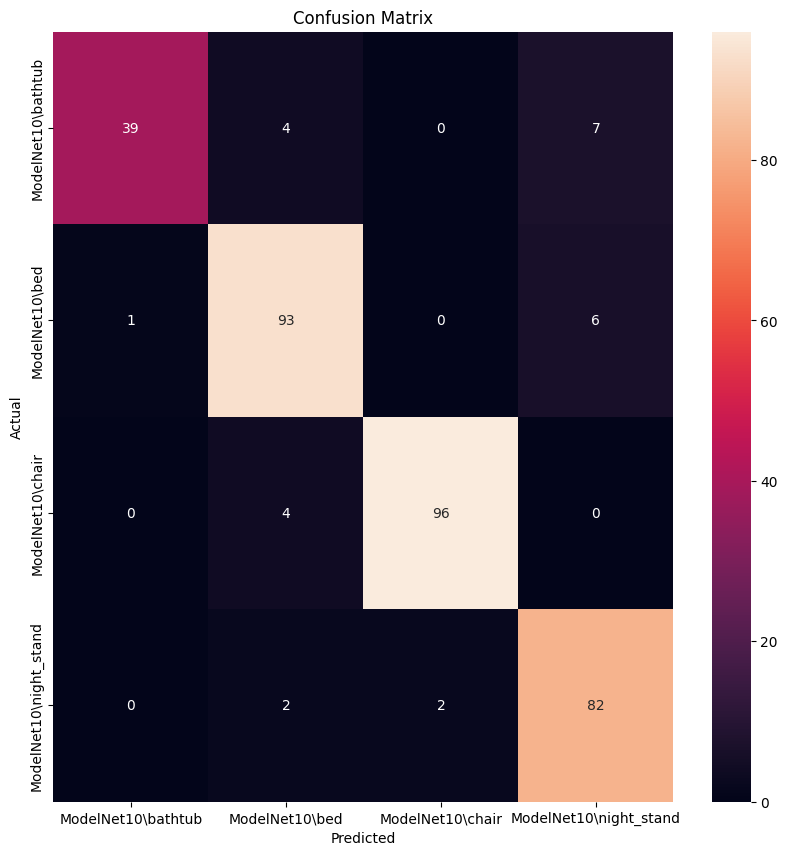

In [18]:
cm = confusion_matrix(all_targets, all_preds)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=CLASS_MAP.values(), yticklabels=CLASS_MAP.values())
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Exercise

As you can see in the Conv3DNet class, comments indicating the output size for each layer have been provided. Now, use different values for kernel size, padding, and stride to generate an output with the shape [32, 128, 4, 4, 4] -> [batch_size, channels, depth, height, width]. Comment on every line with the output.

Finally, train your new network and discuss the results.

In [21]:
class ModifiedConv3DNet(nn.Module):
    def __init__(self):
        super(ModifiedConv3DNet, self).__init__()
        # Input: [batch_size, 1, 24, 24, 24]
        self.features = nn.Sequential(
            nn.Conv3d(1, 32, kernel_size=3, stride=1, padding=1),   # Output: [batch_size, 32, 24, 24, 24]
            nn.ReLU(),
            nn.MaxPool3d(kernel_size=2, stride=2),                  # Output: [batch_size, 32, 12, 12, 12]

            nn.Conv3d(32, 64, kernel_size=3, stride=1, padding=1),  # Output: [batch_size, 64, 12, 12, 12]
            nn.ReLU(),
            nn.MaxPool3d(kernel_size=2, stride=2),                  # Output: [batch_size, 64, 6, 6, 6]

            nn.Conv3d(64, 128, kernel_size=3, stride=1, padding=1), # Output: [batch_size, 128, 6, 6, 6]
            nn.ReLU(),
            nn.MaxPool3d(kernel_size=3, stride=1)                   # Output: [batch_size, 128, 4, 4, 4]
        )

        self.Flatten = torch.nn.Flatten()                           # Output: [batch_size, 128*4*4*4] = [batch_size, 8192]

        self.classifier = nn.Sequential(
            nn.Linear(128 * 4 * 4 * 4, 512),                        # Output: [batch_size, 512]
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(512, NUM_CLASSES)                             # Output: [batch_size, NUM_CLASSES]
        )

    def forward(self, x):
        x = self.features(x)
        x = self.Flatten(x)
        x = self.classifier(x)
        return F.log_softmax(x, dim=1)

Epoch 1/10 - Loss: 0.6424
Epoch 2/10 - Loss: 0.2072
Epoch 3/10 - Loss: 0.1434
Epoch 4/10 - Loss: 0.0828
Epoch 5/10 - Loss: 0.0633
Epoch 6/10 - Loss: 0.0483
Epoch 7/10 - Loss: 0.0563
Epoch 8/10 - Loss: 0.0360
Epoch 9/10 - Loss: 0.0247
Epoch 10/10 - Loss: 0.0301
Test Accuracy: 96.43%


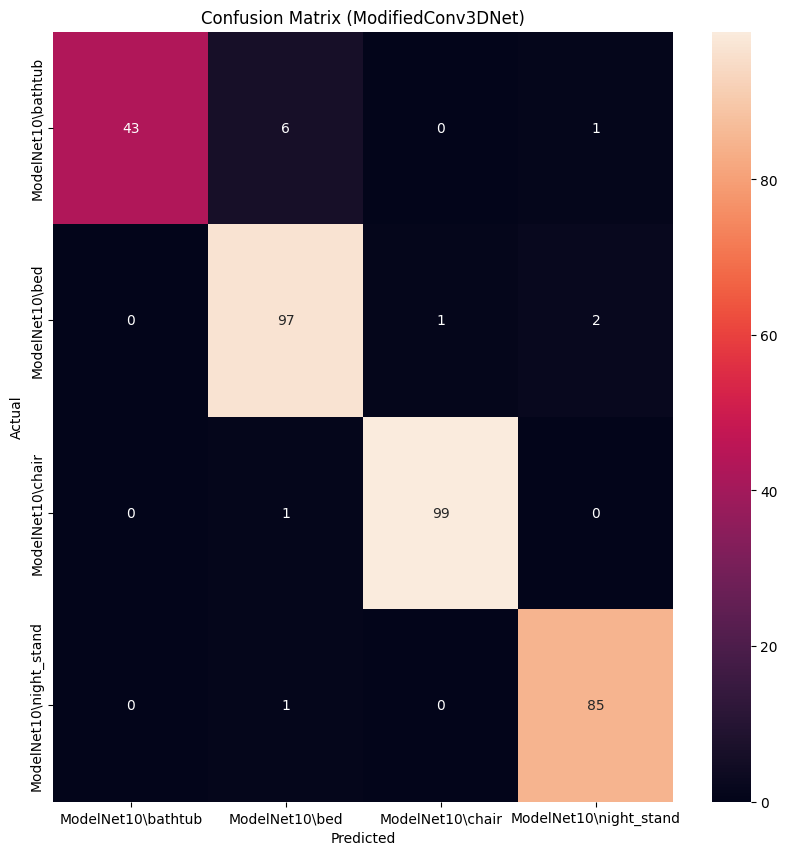

In [ ]:
# Train the modified network (assumes train_loader/test_loader already exist)
model = ModifiedConv3DNet().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

EPOCHS = 10
for epoch in range(EPOCHS):
    model.train()
    running_loss = 0.0

    for data, target in train_loader:
        data = data.unsqueeze(1)                                   # [batch_size, 1, 24, 24, 24]
        data = data.to(device).float()
        target = target.to(device)

        optimizer.zero_grad()
        output = model(data)                                       # [batch_size, NUM_CLASSES]
        loss = criterion(output, torch.max(target, 1)[1])          # target indices from one-hot
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / max(1, len(train_loader))
    print(f"Epoch {epoch+1}/{EPOCHS} - Loss: {avg_loss:.4f}")


# Evaluate (accuracy + confusion matrix)
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

model.eval()
all_preds = []
all_targets = []

with torch.no_grad():
    for data, target in test_loader:
        data = data.unsqueeze(1)                                   # [batch_size, 1, 24, 24, 24]
        data = data.to(device).float()
        target = target.to(device)

        output = model(data)                                       # [batch_size, NUM_CLASSES]
        pred = output.argmax(dim=1)                                # predicted class index
        all_preds.extend(pred.cpu().numpy())
        all_targets.extend(torch.max(target, 1)[1].cpu().numpy())   # true class index

all_preds = np.array(all_preds)
all_targets = np.array(all_targets)

acc = (all_preds == all_targets).mean()
print(f"Test Accuracy: {acc*100:.2f}%")

cm = confusion_matrix(all_targets, all_preds)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=list(CLASS_MAP.values()),
            yticklabels=list(CLASS_MAP.values()))
plt.title("Confusion Matrix (ModifiedConv3DNet)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

The training dynamics indicate fast and stable convergence: the average cross-entropy loss drops sharply from **0.6424** (epoch 1) to ~**0.03** by epoch 10, with only minor oscillations (e.g., a small bump around epoch 7), which is consistent with a 3D CNN learning increasingly abstract spatial hierarchies of features while pooling progressively reduces the spatial resolution and promotes a degree of translation invariance. On the test set, the model achieves **96.43% accuracy (324/336 correct)**, and the confusion matrix shows that performance is highly concentrated on the diagonal, with near-perfect recognition for **chair** (**99/100**) and **night_stand** (**85/86**), and very strong recognition for **bed** (**97/100**). The main weakness is **bathtub** (**43/50**), which is disproportionately confused with **bed** (**6** cases) and occasionally with **night_stand** (**1** case), suggesting that the voxelized representations of these categories share coarse volumetric cues (e.g., large rectangular support surfaces) that may be amplified by aggressive downsampling in later pooling stages. Overall, the results support that the chosen kernel/padding/stride configuration successfully preserves enough 3D structure (ending at **128×4×4×4**) to generalize well, while the residual confusions—especially for the class with fewer test samples—point to typical remedies in CNN practice such as class-balancing (weights), richer augmentation, or architectural refinements (e.g., normalization/residual connections) to better separate visually similar shapes.


In [ ]:
# Sanity-check to verifie that the feature extractor output is [32, 128, 4, 4, 4]

import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ModifiedConv3DNet().to(device)
model.eval()

def assert_exact_feature_shape(batch_size: int = 32):
    with torch.no_grad():
        x = torch.zeros((batch_size, 1, 24, 24, 24), device=device, dtype=torch.float32)
        y = model.features(x)

    expected = (batch_size, 128, 4, 4, 4)
    got = tuple(y.shape)

    print("Expected features shape:", expected)
    print("Got features shape     :", got)

    assert got == expected, f"Shape mismatch. Expected {expected}, got {got}"
    print("EXACT match: features output shape is [batch_size, 128, 4, 4, 4].")

assert_exact_feature_shape(32)


Expected features shape: (32, 128, 4, 4, 4)
Got features shape     : (32, 128, 4, 4, 4)
EXACT match: features output shape is [batch_size, 128, 4, 4, 4].
